In [14]:
%cd darknet/

/home/ecn/Documents/GBB/yolov4-tiny/darknet


In [15]:
!ls

3rdparty		image_yolov3.sh        process.py
backup			image_yolov4.sh        __pycache__
build			include		       README.md
build.ps1		__init__.py	       results
cfg			json_mjpeg_streams.sh  scripts
cmake			libdarknet.so	       src
CMakeLists.txt		LICENSE		       uselib
darknet			Makefile	       vcpkg.json
DarknetConfig.cmake.in	net_cam_v3.sh	       video_yolov3.sh
darknet_images.py	net_cam_v4.sh	       video_yolov4.sh
darknet.py		obj		       yolov4-custom.cfg
darknet_video.py	obj.data	       yolov4-custom_last.weights
data			predictions.jpg        yolov4.weights


In [16]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# define helper function imShow
def imShow(path):

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Check mAP for saved weights

In [5]:
##You can check the mAP for all the saved weights 
!./darknet detector map obj.data yolov4-custom.cfg ../training/yolov4-custom_best.weights -points 0

 CUDA-version: 10020 (10020), cuDNN: 8.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.1.1
 0 : compute_capability = 530, cudnn_half = 0, GPU: NVIDIA Tegra X1 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 

In [20]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' ../../yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' ../../yolov4-tiny-custom.cfg
%cd ..

/home/ecn/Documents/GBB/yolov4-tiny/darknet/cfg
/home/ecn/Documents/GBB/yolov4-tiny/darknet


In [21]:
%ls

3rdparty/               image_yolov3.sh*        process.py
backup/                 image_yolov4.sh*        __pycache__/
build/                  include/                README.md
build.ps1*              __init__.py             results/
cfg/                    json_mjpeg_streams.sh*  scripts/
cmake/                  libdarknet.so*          src/
CMakeLists.txt          LICENSE                 uselib*
darknet*                Makefile                vcpkg.json
DarknetConfig.cmake.in  net_cam_v3.sh*          video_yolov3.sh*
darknet_images.py       net_cam_v4.sh*          video_yolov4.sh*
darknet.py              obj/                    yolov4-custom.cfg
darknet_video.py        obj.data                yolov4-custom_last.weights
data/                   predictions.jpg         yolov4.weights


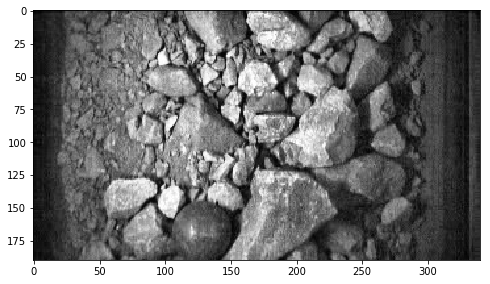

In [23]:
ruta_imgs = "../test_clahe/"
img_test = cv2.imread(ruta_imgs + os.listdir(ruta_imgs)[0])
plt.figure(figsize=(8,8))
plt.imshow(img_test)
plt.show()
# img_test.shape

 CUDA-version: 10020 (10020), cuDNN: 8.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.1.1
 0 : compute_capability = 530, cudnn_half = 0, GPU: NVIDIA Tegra X1 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7

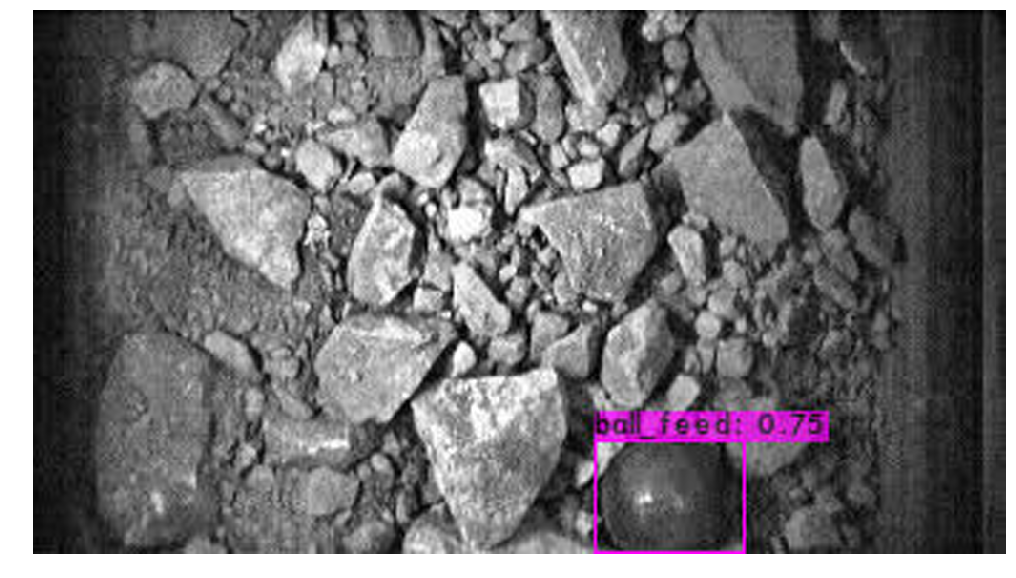

In [26]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test obj.data ../yolov4-tiny-custom.cfg ../training/yolov4-tiny-custom_best.weights '../test_clahe/img_0930_17.jpg' -thresh 0.50 #yolov4-custom_best.weights
imShow('predictions.jpg')

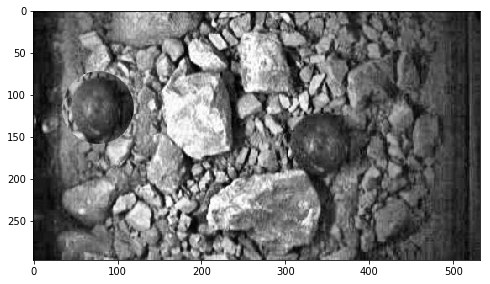

In [32]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_test = cv2.imread("../test_2bolas.jpg", 0)
cl1 = clahe.apply(img_test)
cv2.imwrite("../test_2bolas_clahe.jpg", cl1)

img_test = cv2.imread("../test_2bolas_clahe.jpg")
plt.figure(figsize=(8,8))
plt.imshow(img_test)
plt.show()

 CUDA-version: 10020 (10020), cuDNN: 8.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.1.1
 0 : compute_capability = 530, cudnn_half = 0, GPU: NVIDIA Tegra X1 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7

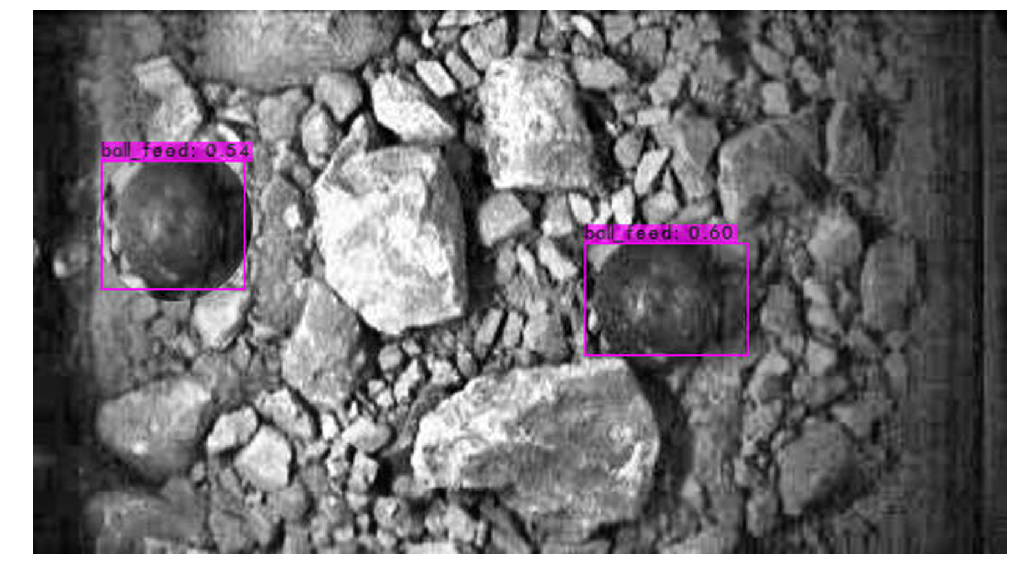

In [33]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test obj.data ../yolov4-tiny-custom.cfg ../training/yolov4-tiny-custom_best.weights "../test_2bolas_clahe.jpg" -thresh 0.50 #yolov4-custom_best.weights
imShow('predictions.jpg')

In [14]:
import os
import time
from pathlib import Path

In [15]:
dir_img_path = 'data/obj/'
list_imgs = [dir_img_path+img for img in os.listdir(dir_img_path) if img.find('.jpg') != -1]

In [16]:
list_imgs

['data/obj/img295.jpg',
 'data/obj/img257.jpg',
 'data/obj/img315.jpg',
 'data/obj/img375.jpg',
 'data/obj/img238.jpg',
 'data/obj/img296.jpg',
 'data/obj/img400.jpg',
 'data/obj/img256.jpg',
 'data/obj/img316.jpg',
 'data/obj/img317.jpg',
 'data/obj/img377.jpg',
 'data/obj/img254.jpg',
 'data/obj/img376.jpg',
 'data/obj/img255.jpg',
 'data/obj/img294.jpg',
 'data/obj/img314.jpg',
 'data/obj/img337.jpg',
 'data/obj/img236.jpg',
 'data/obj/img237.jpg',
 'data/obj/img335.jpg',
 'data/obj/img374.jpg',
 'data/obj/img297.jpg',
 'data/obj/img336.jpg']

In [17]:
!cat ./data/obj.names
%pwd

'/home/ecn/Documents/GBB/cosas_notebook/darknet'

## Ciclo de predicciones

In [18]:
# ruta_video = '../video_bolas_prueba.avi'
# vidcap = cv2.VideoCapture(ruta_video)
# success_, image_ = vidcap.read()
# count = 0
# while success_  == True:
#   # cv2.imwrite("frame%d.jpg" % count, image_)     # save frame as JPEG file      
#   success_,image_ = vidcap.read()
#   data_image = image_
#   predict_image = darknet_helper(data_image, 416, 416)
#   # loop through detections and draw them on transparent overlay image
#   height_ratio = predict_image[2]
#   width_ratio = predict_image[1]
#   # create tra3nsparent overlay for bounding box
#   # bbox_array = np.zeros([416,416,4], dtype=np.uint8)
#   for label, confidence, bbox in predict_image[0]:
#     left, top, right, bottom = bbox2points(bbox)
#     left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
#     bbox_array = cv2.rectangle(data_image, (left, top), (right, bottom), class_colors[label], 2)
#     bbox_array = cv2.putText(data_image, "{} [{:.2f}]".format(label, float(confidence)),
#                       (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
#                       class_colors[label], 2)
#   cv2.imwrite(f"../Predict_to_video/predict_ball_{count}.jpg", data_image)
#   cv2_imshow(data_image)
#   plt.show()
#   count += 1

In [21]:
# import dependencies
from IPython.display import display, Image
# from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
# import html
import time
import matplotlib.pyplot as plt
import numpy as np


# import darknet functions to perform object detections
from darknet import *

# load in our YOLOv4 architecture network
cfg_path = "yolov4-custom.cfg"
weights_path = "../training/yolov4-custom_best.weights"
network, class_names, class_colors = load_network("cfg/yolov4-custom.cfg", "data/obj.data", weights_path)
width = network_width(network)
height = network_height(network)


# # darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

#   # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  


In [22]:
pwd

'/home/ecn/Documents/GBB/cosas_notebook/darknet'

In [ ]:
data_image = cv2.imread('../2bolas_overlap_predict.jpg') #('/content/drive/MyDrive/yolov4/test/test_2.jpg')

In [ ]:
vidcap = cv2.VideoCapture('../yolov4/video_bolas_prueba.avi')
success_,image_ = vidcap.read()
# count = 0
# while success_:
#   cv2.imwrite("frame%d.jpg" % count, image_)     # save frame as JPEG file      
#   success_,image_ = vidcap.read()
#   print('Read a new frame: ', success_)
  # count += 1

In [ ]:
data_image = image_

In [ ]:
predict_image = darknet_helper(data_image, 416, 416)

In [ ]:
predict_image[1]

In [ ]:
# loop through detections and draw them on transparent overlay image
height_ratio = predict_image[2]
width_ratio = predict_image[1]
# create transparent overlay for bounding box
# bbox_array = np.zeros([416,416,4], dtype=np.uint8)
for label, confidence, bbox in predict_image[0]:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  bbox_array = cv2.rectangle(data_image, (left, top), (right, bottom), class_colors[label], 2)
  bbox_array = cv2.putText(data_image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)

# bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
# # convert overlay of bbox into bytes
# bbox_bytes = bbox_to_bytes(bbox_array)
# # # update bbox so next frame gets new overlay
# bbox = bbox_bytes   


In [ ]:
plt.imshow(data_image)
plt.show()

In [ ]:
!mkdir /content/drive/MyDrive/yolov4/Predict_to_video

In [ ]:
vidcap = cv2.VideoCapture('/content/drive/MyDrive/yolov4/video_bolas_prueba.avi')
success_,image_ = vidcap.read()
count = 0
while success_  == True:
  # cv2.imwrite("frame%d.jpg" % count, image_)     # save frame as JPEG file      
  success_,image_ = vidcap.read()
  data_image = image_
  predict_image = darknet_helper(data_image, 416, 416)
  # loop through detections and draw them on transparent overlay image
  height_ratio = predict_image[2]
  width_ratio = predict_image[1]
  # create tra3nsparent overlay for bounding box
  # bbox_array = np.zeros([416,416,4], dtype=np.uint8)
  for label, confidence, bbox in predict_image[0]:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    bbox_array = cv2.rectangle(data_image, (left, top), (right, bottom), class_colors[label], 2)
    bbox_array = cv2.putText(data_image, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  cv2.imwrite(f"/content/drive/MyDrive/yolov4/Predict_to_video/predict_ball_{count}.jpg", data_image)
  cv2_imshow(data_image)
  plt.show()
  count += 1
